# Dólar Minorista y Mayorista

Se utiliza API de datos.gob.ar 

In [1]:
import pandas as pd
import requests
import urllib.parse

# Making REQUEST API Series de Tiempo datos.gob.ar
def get_api_call(ids, **kwargs):
    API_BASE_URL = "https://apis.datos.gob.ar/series/api/"
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))

dólar mayorista y minorista por mes con valor del último día hábil 

tipo_cambio_bna_vendedor (Dólar Minorista)

tipo_cambio_a3500 (Dólar Mayorista)

In [ ]:
datos = pd.read_csv(get_api_call(["168.1_T_CAMBIOR_D_0_0_26","168.1_T_CAMBI500_D_0_0_17"],
format="csv", start_date="2007-01",collapse="month",representation_mode="value",limit=200,collapse_aggregation="end_of_period"
))

In [3]:
df = datos.copy()

In [4]:
len(df)

193

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   indice_tiempo             193 non-null    object 
 1   tipo_cambio_bna_vendedor  98 non-null     float64
 2   tipo_cambio_a3500         193 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.6+ KB


In [6]:
df.head()

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500
0,2007-01-01,NaN,3.1063
1,2007-02-01,NaN,3.1010
2,2007-03-01,NaN,3.1007
3,2007-04-01,NaN,3.0898
4,2007-05-01,NaN,3.0785


In [7]:
df.tail()

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500
188,2022-09-01,153.25,147.3150
189,2022-10-01,162.50,156.8950
190,2022-11-01,174.25,167.2550
191,2022-12-01,183.25,177.1283
192,2023-01-01,194.00,186.8750


agrego valores de Febrero 2023, valor del último día hábil del mes 

Tipo de Cambio Minorista Febrero: 204.39

Tipo de Cambio Mayorista  Febrero: 197.15  


In [ ]:
new_dict = {'indice_tiempo': '2023-02-01', 'tipo_cambio_bna_vendedor': 204.39, 'tipo_cambio_a3500': 197.15}

In [9]:
df = df.append(new_dict, ignore_index=True)

In [10]:
df['indice_tiempo'] = pd.to_datetime(df['indice_tiempo']) 

In [11]:
df.set_index('indice_tiempo',inplace=True)

## Tabla con cotización de dolar minorista y mayorista 

In [12]:
df

,tipo_cambio_bna_vendedor,tipo_cambio_a3500
indice_tiempo,,
2007-01-01,NaN,3.1063
2007-02-01,NaN,3.1010
2007-03-01,NaN,3.1007
2007-04-01,NaN,3.0898
2007-05-01,NaN,3.0785
...,...,...
2022-10-01,162.50,156.8950
2022-11-01,174.25,167.2550
2022-12-01,183.25,177.1283


# Dólar Blue

dólar blue (Valor vendedor) histórico inicio 2011 

In [ ]:
df_blue = pd.read_excel("/content/dolar_blue_historico.xlsx",usecols=[0,2])

In [14]:
df_blue.head()

,Fecha,Venta
0,2023-03-08,371.0
1,2023-03-07,372.0
2,2023-03-06,375.0
3,2023-03-03,377.0
4,2023-03-02,375.0


In [15]:
df_blue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   2996 non-null   datetime64[ns]
 1   Venta   2996 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.9 KB


In [16]:
# convierto los datos a valor por mes tomando el último valor del mes 
df_blue_grouped = df_blue.groupby(pd.Grouper(key='Fecha', axis=0, freq='M')).last()
# descarto el mes de marzo 2023
df_blue_grouped = df_blue_grouped[:-1]

In [17]:
df_blue_grouped

,Venta
Fecha,
2011-01-31,4.14
2011-02-28,4.15
2011-03-31,4.16
2011-04-30,4.31
2011-05-31,4.30
...,...
2022-10-31,290.00
2022-11-30,314.00
2022-12-31,346.00


In [18]:
# creo rango de fechas con dia = 1 
fechas = []

for a in range(2011,2024):
  for m in range(1,13):
    if m < 10:
      mes = f'0{m}'
      fecha = f'{a}-{mes}-01'
      fechas.append(fecha)
    else:
      mes = m 
      fecha = f'{a}-{mes}-01'
      fechas.append(fecha)

In [19]:
# hasta 2023-02-01
fechas = fechas[:-10]

In [20]:
fechas_dt = pd.to_datetime(fechas)

In [21]:
# valores de cotizacion
lista_dolar_blue = df_blue_grouped['Venta'].to_list()

In [22]:
df_blue_clean = pd.DataFrame({'Fecha':fechas_dt,'dolar_blue':lista_dolar_blue})
df_blue_clean.set_index('Fecha',inplace=True)

## Tabla con cotización de dolar blue

In [23]:
df_blue_clean

,dolar_blue
Fecha,
2011-01-01,4.14
2011-02-01,4.15
2011-03-01,4.16
2011-04-01,4.31
2011-05-01,4.30
...,...
2022-10-01,290.00
2022-11-01,314.00
2022-12-01,346.00


# Inflación

In [24]:
df_inf = pd.read_excel("/content/inflacion_argentina(2004-Actualidad).xlsx")

In [25]:
df_inf.tail()

,mes,ipc
224,2022-09-01,6.2
225,2022-10-01,6.3
226,2022-11-01,4.9
227,2022-12-01,5.1
228,2023-01-01,6.0


In [26]:
# para la inflación de Febrero 2023 se utiliza la inflación de Ciudad de Buenos Aires (6%) 
new_dict_inf = {'mes': '2023-02-01', 'ipc': 6.0}
df_inf = df_inf.append(new_dict_inf,ignore_index=True)
df_inf['mes'] = pd.to_datetime(df_inf['mes']) 
df_inf.set_index('mes',inplace=True)
df_inf = df_inf.mul(0.01) #en decimales

## Tabla con inflación

In [27]:
df_inf

,ipc
mes,
2004-01-01,0.004
2004-02-01,0.001
2004-03-01,0.006
2004-04-01,0.009
2004-05-01,0.007
...,...
2022-10-01,0.063
2022-11-01,0.049
2022-12-01,0.051


# Dataframe completo

In [29]:
df_new = pd.merge(df,df_blue_clean,how='left',left_index=True, right_index=True)
df_dolar = pd.merge(df_new,df_inf,how='left',left_index=True, right_index=True)
df_dolar.rename(columns={'tipo_cambio_bna_vendedor':'dolar_minorista','tipo_cambio_a3500':'dolar_mayorista'},inplace=True)

In [30]:
df_dolar

,dolar_minorista,dolar_mayorista,dolar_blue,ipc
indice_tiempo,,,,
2007-01-01,NaN,3.1063,NaN,0.011
2007-02-01,NaN,3.1010,NaN,0.007
2007-03-01,NaN,3.1007,NaN,0.010
2007-04-01,NaN,3.0898,NaN,0.023
2007-05-01,NaN,3.0785,NaN,0.021
...,...,...,...,...
2022-10-01,162.50,156.8950,290.0,0.063
2022-11-01,174.25,167.2550,314.0,0.049
2022-12-01,183.25,177.1283,346.0,0.051


Generar columnas de variacion porcentual

In [31]:
df_dolar['dolar_minorista_pct_change'] = df_dolar['dolar_minorista'].pct_change()
df_dolar['dolar_mayorista_pct_change'] = df_dolar['dolar_mayorista'].pct_change()
df_dolar['dolar_blue_pct_change'] = df_dolar['dolar_blue'].pct_change()

In [32]:
df_dolar

,dolar_minorista,dolar_mayorista,dolar_blue,ipc,dolar_minorista_pct_change,dolar_mayorista_pct_change,dolar_blue_pct_change
indice_tiempo,,,,,,,
2007-01-01,NaN,3.1063,NaN,0.011,NaN,NaN,NaN
2007-02-01,NaN,3.1010,NaN,0.007,NaN,-0.001706,NaN
2007-03-01,NaN,3.1007,NaN,0.010,NaN,-0.000097,NaN
2007-04-01,NaN,3.0898,NaN,0.023,NaN,-0.003515,NaN
2007-05-01,NaN,3.0785,NaN,0.021,NaN,-0.003657,NaN
...,...,...,...,...,...,...,...
2022-10-01,162.50,156.8950,290.0,0.063,0.060359,0.065031,0.006944
2022-11-01,174.25,167.2550,314.0,0.049,0.072308,0.066031,0.082759
2022-12-01,183.25,177.1283,346.0,0.051,0.051650,0.059031,0.101911


Generar columnas de Brecha Cambiaria (dolar minorista y blue)

In [33]:
df_dolar['brecha'] = abs(df_dolar['dolar_minorista']-df_dolar['dolar_blue'])
df_dolar['brecha%'] = df_dolar['brecha']/df_dolar['dolar_minorista']

In [34]:
df_dolar

,dolar_minorista,dolar_mayorista,dolar_blue,ipc,dolar_minorista_pct_change,dolar_mayorista_pct_change,dolar_blue_pct_change,brecha,brecha%
indice_tiempo,,,,,,,,,
2007-01-01,NaN,3.1063,NaN,0.011,NaN,NaN,NaN,NaN,NaN
2007-02-01,NaN,3.1010,NaN,0.007,NaN,-0.001706,NaN,NaN,NaN
2007-03-01,NaN,3.1007,NaN,0.010,NaN,-0.000097,NaN,NaN,NaN
2007-04-01,NaN,3.0898,NaN,0.023,NaN,-0.003515,NaN,NaN,NaN
2007-05-01,NaN,3.0785,NaN,0.021,NaN,-0.003657,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-10-01,162.50,156.8950,290.0,0.063,0.060359,0.065031,0.006944,127.50,0.784615
2022-11-01,174.25,167.2550,314.0,0.049,0.072308,0.066031,0.082759,139.75,0.802009
2022-12-01,183.25,177.1283,346.0,0.051,0.051650,0.059031,0.101911,162.75,0.888131


# Gráficos

In [35]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

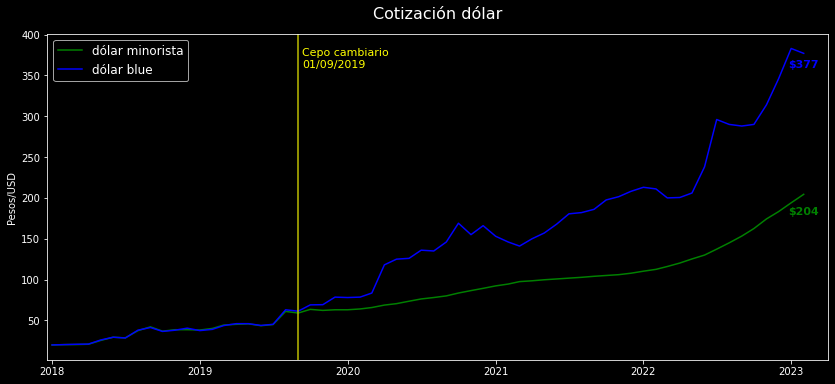

In [36]:
fig, ax = plt.subplots(figsize=(14,6))

ax = sns.lineplot(x=df_dolar['dolar_minorista']['2018-01-01':].index, y=df_dolar['dolar_minorista']['2018-01-01':],color='green',label='dólar minorista',ax=ax)
ax = sns.lineplot(x=df_dolar['dolar_blue']['2018-01-01':].index, y=df_dolar['dolar_blue']['2018-01-01':],color='blue',label='dólar blue',ax=ax)

cepo = pd.to_datetime('2019-09-01')
plt.axvline(x =cepo, color="y", ls = '-')
plt.text(18150,360,'Cepo cambiario \n01/09/2019',color='yellow',fontdict={'fontsize':11})
plt.text(19350, 180,'$204',color='green',fontdict={'fontsize':11,'fontweight':'bold'})
plt.text(19350, 360,'$377',color='blue',fontdict={'fontsize':11,'fontweight':'bold'})

ax.set_title('Cotización dólar',{'fontsize': 16},pad=15)
ax.set_xlabel('')
ax.set_ylabel('Pesos/USD')
plt.xlim(17520,19450)

plt.legend(fontsize='large')
plt.show()

In [37]:
top_10_deva_minorista = df_dolar['dolar_minorista_pct_change'].sort_values(ascending=False)[:10]
top_10_deva_blue = df_dolar['dolar_blue_pct_change'].sort_values(ascending=False)[:10]
top_10_inf = df_dolar['ipc'].sort_values(ascending=False)[:10]

<ipython-input-38-866b633a7d62>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


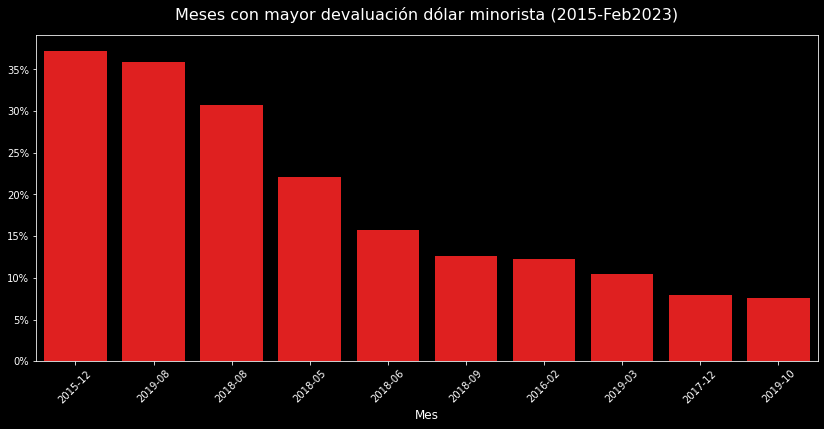

In [38]:
fig, ax = plt.subplots(figsize=(14,6))

ax = sns.barplot(x=top_10_deva_minorista.index.date,y=top_10_deva_minorista,color='red',ax=ax)
ax.set_title('Meses con mayor devaluación dólar minorista (2015-Feb2023)',{'fontsize': 16},pad=15)

# manipulate X axis 
ax.set_xticklabels(top_10_deva_minorista.index.strftime('%Y-%m'),rotation=45)
# manipulate Y axis 
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set_xlabel('Mes', size=12)
ax.set_ylabel('')

plt.show()

<ipython-input-39-e0caeb97f484>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


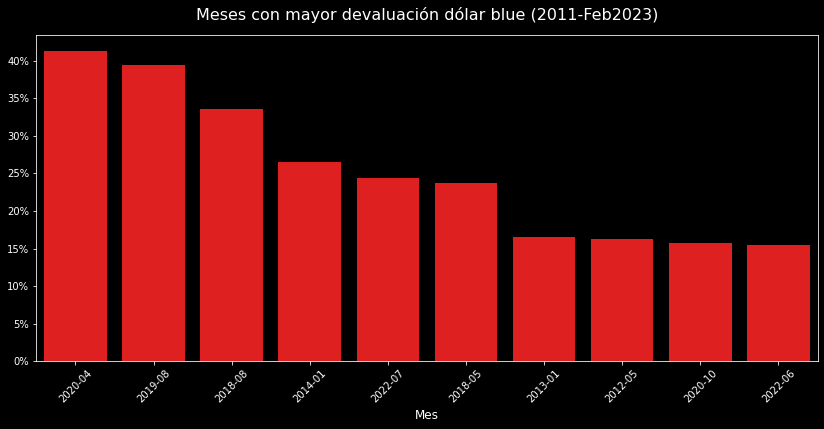

In [39]:
fig, ax = plt.subplots(figsize=(14,6))

ax = sns.barplot(x=top_10_deva_blue.index.date,y=top_10_deva_blue,color='red',ax=ax)
ax.set_title('Meses con mayor devaluación dólar blue (2011-Feb2023)',{'fontsize': 16},pad=15)

# manipulate X axis 
ax.set_xticklabels(top_10_deva_blue.index.strftime('%Y-%m'),rotation=45)
# manipulate Y axis 
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set_xlabel('Mes', size=12)
ax.set_ylabel('')

plt.show()

<ipython-input-40-37c076bdb88a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


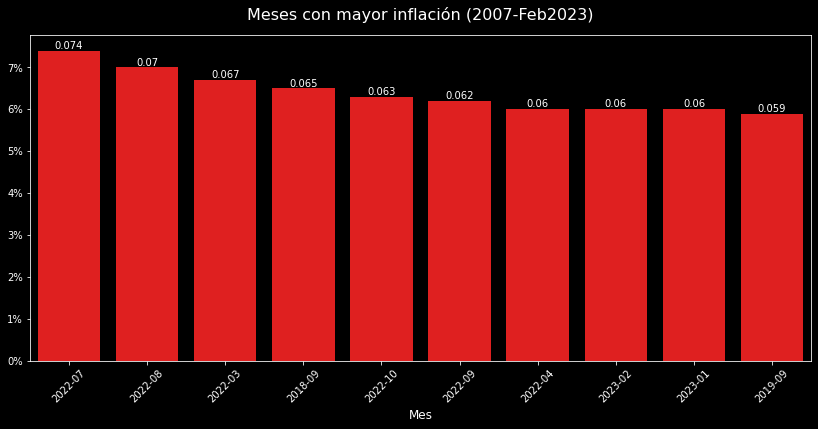

In [40]:
fig, ax = plt.subplots(figsize=(14,6))

ax = sns.barplot(x=top_10_inf.index.date,y=top_10_inf,color='red',ax=ax)
ax.set_title('Meses con mayor inflación (2007-Feb2023)',{'fontsize': 16},pad=15)

for i in ax.containers:
    ax.bar_label(i,)

# manipulate X axis 
ax.set_xticklabels(top_10_inf.index.strftime('%Y-%m'),rotation=45)
# manipulate Y axis 
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set_xlabel('Mes', size=12)
ax.set_ylabel('')

plt.show()

<ipython-input-41-b92d1920ba04>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


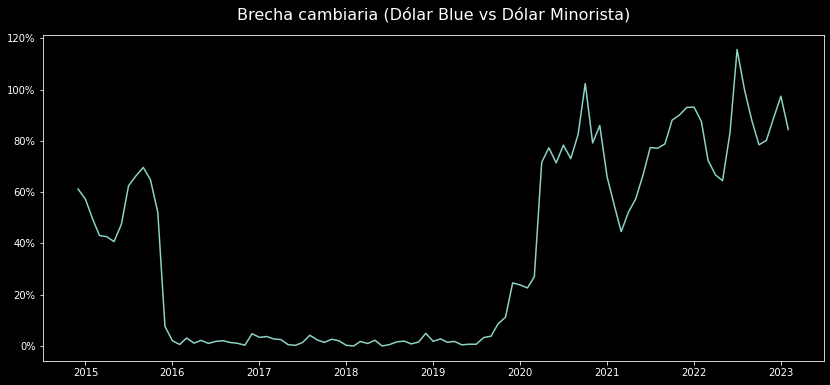

In [41]:
fig, ax = plt.subplots(figsize=(14,6))

ax = sns.lineplot(x=df_dolar['brecha%'].index,y=df_dolar['brecha%'],ax=ax)
ax.set_title('Brecha cambiaria (Dólar Blue vs Dólar Minorista)',{'fontsize': 16},pad=15)

# manipulate Y axis 
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

<ipython-input-42-bf8203dfba75>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


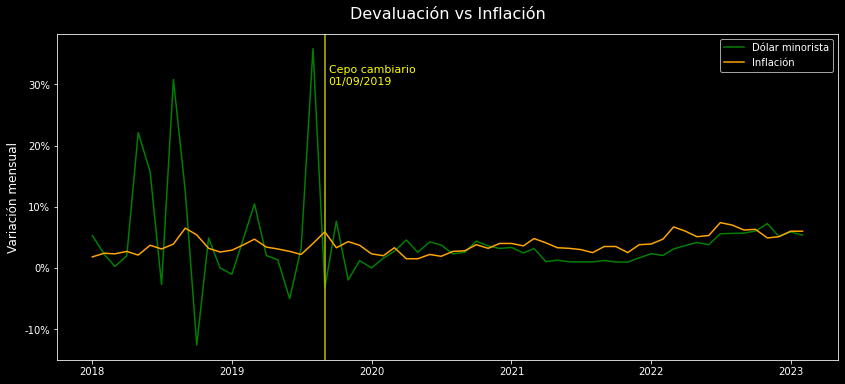

In [42]:
fig, ax = plt.subplots(figsize=(14,6))

ax = sns.lineplot(x=df_dolar['dolar_minorista_pct_change']['2018-01-01':].index, y=df_dolar['dolar_minorista_pct_change']['2018-01-01':],color='green',label='Dólar minorista',ax=ax)
#ax = sns.lineplot(x=df_dolar['dolar_blue_pct_change']['2018-01-01':].index, y=df_dolar['dolar_blue_pct_change']['2018-01-01':],color='blue',label='Dólar blue',ax=ax)
ax = sns.lineplot(x=df_dolar['ipc']['2018-01-01':].index, y=df_dolar['ipc']['2018-01-01':],color='orange',label='Inflación',ax=ax)

cepo = pd.to_datetime('2019-09-01')
plt.axvline(x =cepo, color="y", ls = '-')
plt.text(18150,0.3,'Cepo cambiario \n01/09/2019',color='yellow',fontdict={'fontsize':11})

ax.set_title('Devaluación vs Inflación',{'fontsize': 16},pad=15)
ax.set_xlabel('')
ax.set_ylabel('Variación mensual',size=12)

# manipulate Y axis 
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.legend()
plt.show()